# Analysis for the embeddings 

In [1]:
# Load the embeddings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE

# Load the embeddings
trait_df = pd.read_csv('trait_df.csv', index_col=0)
sample_df = pd.read_csv('final_sample.csv')


# Visualization of samples and traits

In [2]:
matrix = sample_df.embedding.apply(eval).to_list() + trait_df.embedding.apply(eval).to_list()

In [3]:
# Convert matrix to a NumPy array
matrix_np = np.array(matrix)

In [4]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

In [5]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

In [6]:
# Add the t-SNE results to the data frame
sample_df['tsne_x_sample_trait'] = x[:len(sample_df)]
sample_df['tsne_y_sample_trait'] = y[:len(sample_df)]
trait_df['tsne_x_sample_trait'] = x[len(sample_df):]
trait_df['tsne_y_sample_trait'] = y[len(sample_df):]

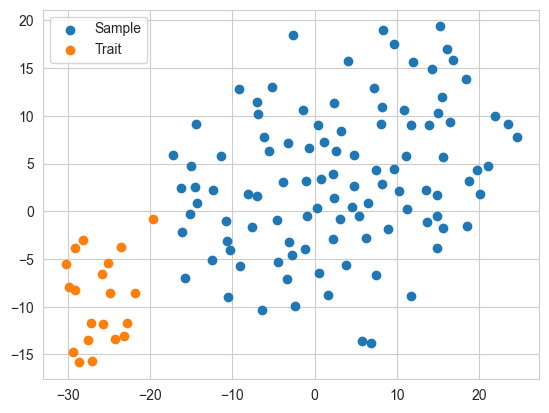

In [7]:
# Plot the t-SNE results
fig, ax = plt.subplots()
ax.scatter(sample_df.tsne_x_sample_trait, sample_df.tsne_y_sample_trait, label='Sample')
ax.scatter(trait_df.tsne_x_sample_trait, trait_df.tsne_y_sample_trait, label='Trait')
ax.legend()
plt.show()

# Visualization of Samples only 

In [8]:
matrix = sample_df.embedding.apply(eval).to_list() 
# Convert matrix to a NumPy array
matrix_np = np.array(matrix)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

In [9]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

In [10]:
# Add the t-SNE results to the data frame
sample_df['tsne_x_sample'] = x
sample_df['tsne_y_sample'] = y

In [11]:
# preview sample_df
sample_df.head(6)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,you_should_message_me_if,merged_profile,cleaned_religion,seriousness_degree,belief,embedding,tsne_x_sample_trait,tsne_y_sample_trait,tsne_x_sample,tsne_y_sample
0,43,single,f,bisexual,curvy,strictly vegetarian,rarely,NaN,dropped out of college/university,white,...,if you want to be my friend who i can spend ti...,june is turning out to be crazy because my new...,atheism,4.0,atheism,"[0.010035235434770584, -0.04175163060426712, -...",2.561301,6.352235,0.617637,-10.110859
1,25,seeing someone,m,bisexual,fit,mostly anything,socially,sometimes,working on ph.d program,white,...,you feel like it. i promise i won't bite. but ...,"well, i'm in a relationship now. i'm keeping m...",atheism,4.0,atheism,"[-0.0027743300888687372, -0.023896805942058563...",16.121382,16.964415,-41.818817,32.768166
2,36,single,m,gay,average,NaN,often,never,NaN,white,...,"you are younger, slim to athletic, smooth to s...","i have a tempered, reasonable way of thinking....",atheism,4.0,atheism,"[0.002556383376941085, -0.0058164591901004314,...",0.420033,9.085909,9.759092,-20.171118
3,27,available,f,bisexual,curvy,anything,socially,sometimes,dropped out of two-year college,"native american, hispanic / latin, white",...,"you're good in the sack, can respect my marria...",i'm an adult actress who has recently started ...,atheism,4.0,atheism,"[0.0430191308259964, -0.010054229758679867, -0...",-7.661303,-1.654478,26.133169,-21.815580
4,42,available,m,straight,overweight,strictly anything,often,sometimes,working on space camp,white,...,we're a 99% match. i'm willing to listen if we...,i'm a 42-year-old divorced father of two boys ...,atheism,4.0,atheism,"[0.017534952610731125, -0.03899239003658295, -...",2.397567,11.375900,2.004565,-22.876705
5,32,seeing someone,f,bisexual,curvy,mostly vegetarian,very often,never,NaN,white,...,*you'd like to discuss my future breakdancing ...,edit: my life is pretty full right now. i've b...,atheism,4.0,atheism,"[0.020217396318912506, -0.019407430663704872, ...",23.523518,9.143626,-40.931484,-24.244244


In [12]:
# preview trait_df
trait_df.head(6)

,embedding,tsne_x_sample_trait,tsne_y_sample_trait
trait,,,
Confidence,"[0.0030066920444369316, 0.023917969316244125, ...",-25.159050,-5.460770
Kindness and Compassion,"[0.0016048743855208158, -0.021392831578850746,...",-23.218712,-13.093249
Sense of Humor,"[-0.004063126631081104, 0.007852434180676937, ...",-19.629057,-0.813614
Intelligence and Education,"[0.01945118047297001, 0.0042092157527804375, -...",-28.216866,-3.016228
Emotional Stability,"[0.007982526905834675, -0.008557992056012154, ...",-25.884626,-6.620493
Physical Attractiveness,"[0.014652966521680355, -0.005493862088769674, ...",-30.245287,-5.528705


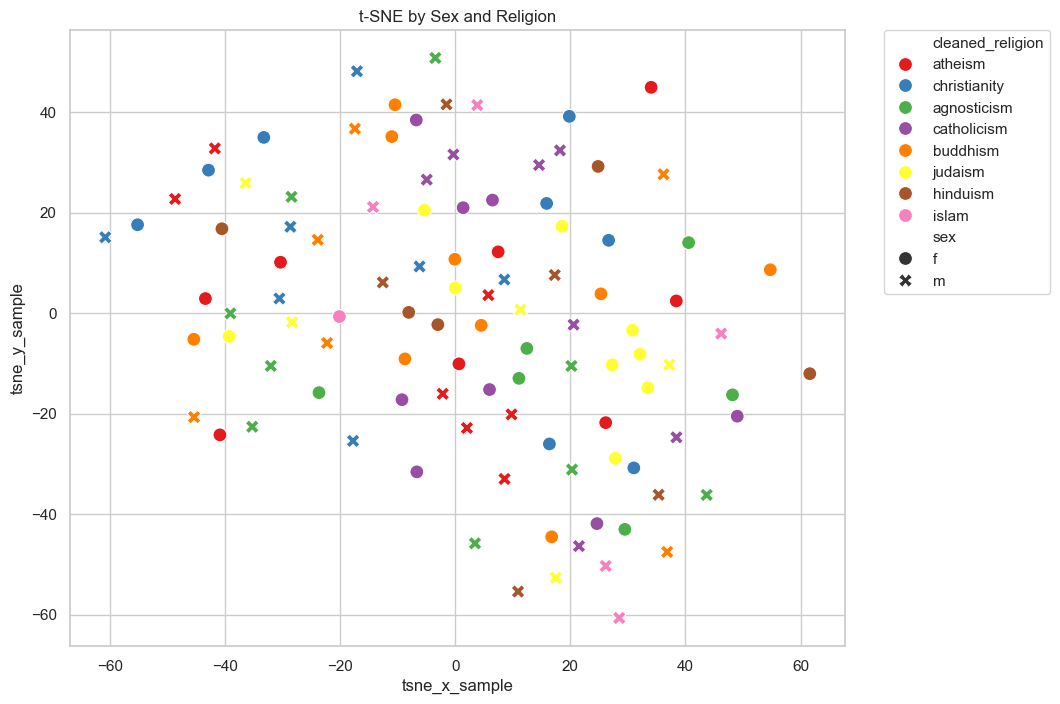

In [13]:
# Plot the t-SNE results
import seaborn as sns

# Check if the specified columns are present in the dataframe
required_columns = ['tsne_x_sample', 'tsne_y_sample', 'sex', 'cleaned_religion']
missing_columns = [col for col in required_columns if col not in sample_df.columns]

# If no columns are missing, proceed with plotting
if not missing_columns:
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(x='tsne_x_sample', y='tsne_y_sample', 
                              style='sex', hue='cleaned_religion', 
                              data=sample_df, palette='Set1', s=100)

    # Add a legend and title
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('t-SNE by Sex and Religion')

    # Show the plot
    plt.show()
else:
    missing_columns

# Compare cosince similarity between samples and traits

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the samples and traits
sample_trait_similarity = cosine_similarity(sample_df.embedding.apply(eval).to_list(), trait_df.embedding.apply(eval).to_list())

In [15]:
sample_trait_similarity.shape

(105, 20)

In [19]:
# create a dataframe for sample_trait_similarity where the index is the sample_id and the columns are the trait_id
sample_trait_similarity_df = pd.DataFrame(sample_trait_similarity, index=sample_df.index, columns=trait_df.index)

# Display the first few rows of the data frame
sample_trait_similarity_df

trait,Confidence,Kindness and Compassion,Sense of Humor,Intelligence and Education,Emotional Stability,Physical Attractiveness,Ambition and Passion,Compatibility and Shared Values,Communication Skills,Generosity and Charity,Spiritual Commitment and Shared Religious Practices,Moral Integrity and Respect for Tradition,Family Values,Patience and Forgiveness,Humility and Modesty,Openness to Growth,Purity and Chastity,High Social Status and Wealth,Masculinity,Femininity
0,0.099433,0.196504,0.261465,0.213190,0.141992,0.213757,0.212865,0.260684,0.130860,0.109135,0.135104,0.135608,0.104665,0.146181,0.132220,0.181319,0.126247,0.174401,0.129114,0.168873
1,0.134532,0.097457,0.193962,0.105638,0.066324,0.131314,0.094809,0.059870,0.187128,0.041692,0.060186,0.044415,-0.002052,0.065894,0.081691,0.128832,0.029192,0.057414,0.056419,0.085450
2,0.138342,0.138725,0.211848,0.189166,0.154527,0.267990,0.158051,0.212880,0.160960,0.058436,0.082286,0.088067,0.046777,0.121898,0.145371,0.201125,0.074878,0.133860,0.145874,0.131375
3,0.145015,0.117514,0.218881,0.117847,0.127183,0.288851,0.153706,0.180975,0.112770,0.126956,0.093120,0.156288,0.153626,0.099137,0.179056,0.135315,0.152719,0.165908,0.185834,0.255579
4,0.179454,0.098656,0.182225,0.167229,0.131638,0.239598,0.109072,0.331929,0.128634,0.043348,0.122104,0.102087,0.069727,0.079158,0.109573,0.169127,0.094610,0.144264,0.062505,0.101531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.089907,0.153825,0.147698,0.147924,0.057979,0.066270,0.115898,0.104185,0.078759,0.150065,0.180065,0.166493,0.105198,0.086568,0.165093,0.135347,0.182398,0.156896,0.072492,0.090565
101,0.096706,0.167971,0.239644,0.206817,0.133217,0.108322,0.203205,0.180088,0.154853,0.121085,0.132605,0.107198,0.098002,0.118831,0.085647,0.177149,0.059676,0.155952,0.050888,0.082257
102,0.116315,0.086029,0.121503,0.128248,0.061601,0.102481,0.127027,0.078528,0.170100,0.015491,0.045491,0.032195,0.055345,0.090845,0.066852,0.138668,0.058320,0.056841,0.055469,0.070183
103,0.146767,0.092665,0.196320,0.083992,0.090144,0.085291,0.156447,0.075699,0.099150,0.060474,0.050544,0.023324,0.085918,0.095597,0.126712,0.144459,0.172979,0.066378,0.084826,0.151641


In [21]:
# concatenate the sample_df and sample_trait_similarity_df
sample_df = pd.concat([sample_df, sample_trait_similarity_df], axis=1)

# Display the first few rows of the data frame
sample_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Spiritual Commitment and Shared Religious Practices,Moral Integrity and Respect for Tradition,Family Values,Patience and Forgiveness,Humility and Modesty,Openness to Growth,Purity and Chastity,High Social Status and Wealth,Masculinity,Femininity
0,43,single,f,bisexual,curvy,strictly vegetarian,rarely,NaN,dropped out of college/university,white,...,0.135104,0.135608,0.104665,0.146181,0.132220,0.181319,0.126247,0.174401,0.129114,0.168873
1,25,seeing someone,m,bisexual,fit,mostly anything,socially,sometimes,working on ph.d program,white,...,0.060186,0.044415,-0.002052,0.065894,0.081691,0.128832,0.029192,0.057414,0.056419,0.085450
2,36,single,m,gay,average,NaN,often,never,NaN,white,...,0.082286,0.088067,0.046777,0.121898,0.145371,0.201125,0.074878,0.133860,0.145874,0.131375
3,27,available,f,bisexual,curvy,anything,socially,sometimes,dropped out of two-year college,"native american, hispanic / latin, white",...,0.093120,0.156288,0.153626,0.099137,0.179056,0.135315,0.152719,0.165908,0.185834,0.255579
4,42,available,m,straight,overweight,strictly anything,often,sometimes,working on space camp,white,...,0.122104,0.102087,0.069727,0.079158,0.109573,0.169127,0.094610,0.144264,0.062505,0.101531


In [35]:
# create a sample_df for men and women 
sample_df_m = sample_df[sample_df['sex'] == 'm']
sample_df_f = sample_df[sample_df['sex'] == 'f']

# print the shape of the sample_df_m and sample_df_f
sample_df_m.shape, sample_df_f.shape

((51, 78), (54, 78))

In [43]:
# Split the data based on the 'sex' category
female_df = sample_df_f.groupby('cleaned_religion').apply(lambda x: x.iloc[:, -20:].mean())
male_df = sample_df_m.groupby('cleaned_religion').apply(lambda x: x.iloc[:, -20:].mean())

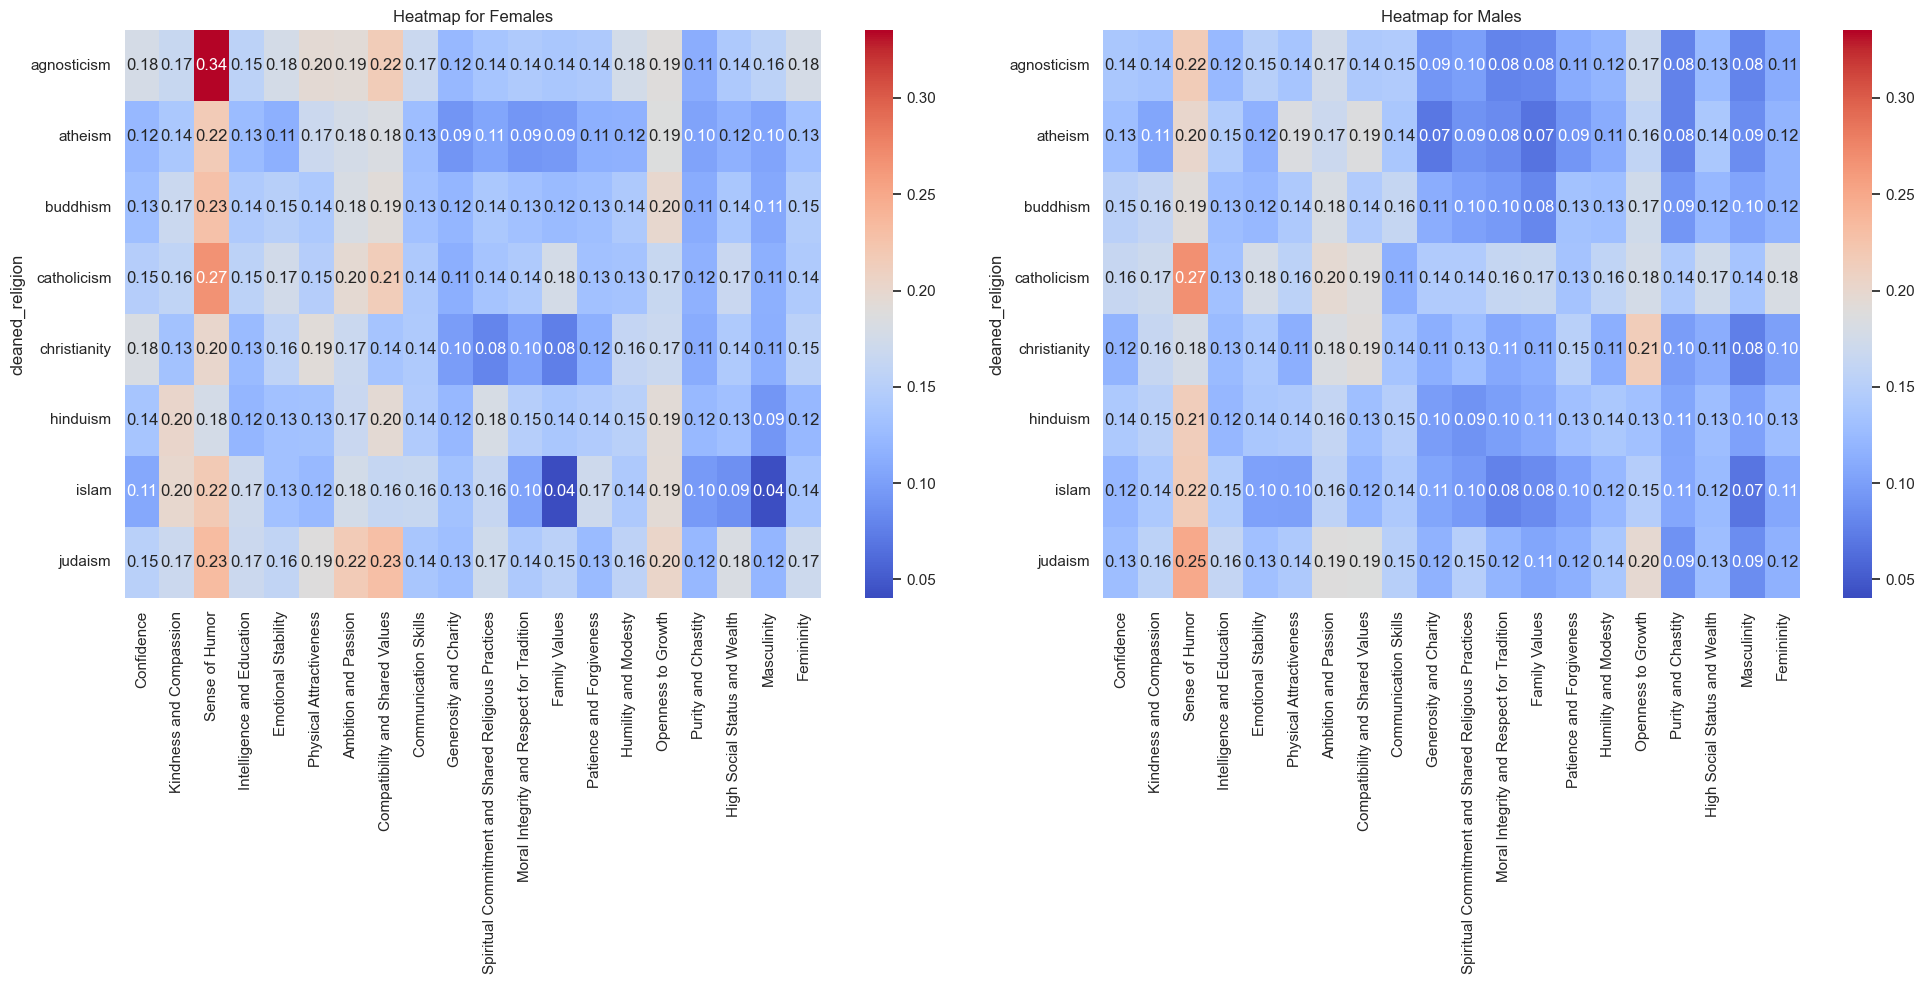

In [59]:
# Calculate the global minimum and maximum of the dataframes
vmin = min(female_df.min().min(), male_df.min().min())
vmax = max(female_df.max().max(), male_df.max().max())

# Create heatmaps for both subsets
plt.figure(figsize=(20, 10))

# Heatmap for 'f'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(female_df, cmap='coolwarm', annot=True, fmt=".2f", vmin=vmin, vmax=vmax)
plt.title('Heatmap for Females')
plt.yticks(rotation=0)  # rotate the y-axis labels for left plot

# Heatmap for 'm'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(male_df, cmap='coolwarm', annot=True, fmt=".2f", vmin=vmin, vmax=vmax)
plt.title('Heatmap for Males')
plt.yticks(rotation=0)  # rotate the y-axis labels for right plot

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()